This file will show the analysis on experience level vs average salary for data science professionals

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
clean_metadata_path = "../Resources/clean_data.csv"


# Read the mouse data and the study results
clean_data = pd.read_csv(clean_metadata_path)
clean_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,239900,USD,239900,US,100,US,M
1,2023,SE,FT,Data Scientist,159900,USD,159900,US,100,US,M
2,2023,EN,FT,Data Analyst,162240,USD,162240,US,0,US,M
3,2023,EN,FT,Data Analyst,47840,USD,47840,US,0,US,M
4,2023,SE,FT,Data Engineer,130410,USD,130410,US,0,US,M


This section will group the data by the experience level and calculate the average salary of each experience level

In [14]:
clean_data_salary_avg = clean_data.groupby(['experience_level'])['salary'].mean()
clean_data_salary_avg

experience_level
EN    104214.773414
EX    195334.814815
MI    133462.707562
SE    168708.433672
Name: salary, dtype: float64

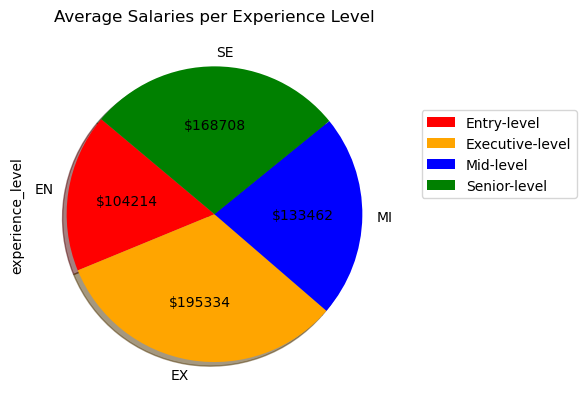

In [15]:
plt.pie(clean_data_salary_avg, labels=clean_data_salary_avg.index, colors=['red','orange','blue','green'],
         shadow=True, startangle=140,autopct=lambda p:f'${int(p*sum(clean_data_salary_avg)/100)}')
plt.ylabel('experience_level')
plt.title('Average Salaries per Experience Level')
plt.legend(['Entry-level','Executive-level','Mid-level', 'Senior-level'],loc='upper right',bbox_to_anchor=(1.5, 0.8))

# Save an image of the chart and print to screen
plt.savefig("Average-Salaries-Exp_level.png")
plt.show()

In [16]:
aggregate_data = clean_data.groupby('experience_level')['salary'].agg(['mean','median']).reset_index()
agg_sorted_data =aggregate_data.sort_values(by='mean',ascending=True)
agg_sorted_data

,experience_level,mean,median
0,EN,104214.773414,90000.0
2,MI,133462.707562,125000.0
3,SE,168708.433672,160000.0
1,EX,195334.814815,191000.0


The graph below shows the median and mean of the salaries per experience level. The results show a positive relationship i.e. as the experience level increases the mean and median salary increases

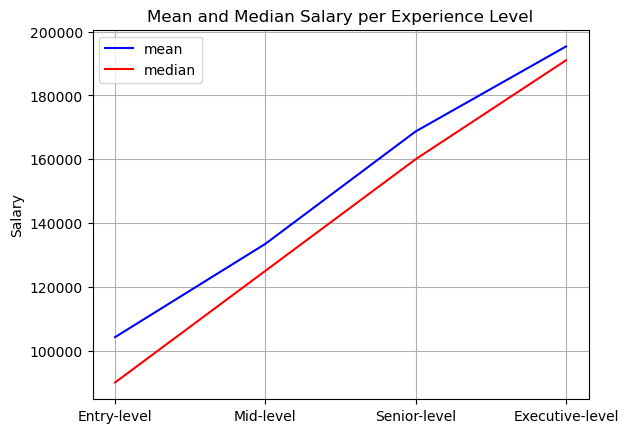

In [17]:
plt.plot(agg_sorted_data['experience_level'],agg_sorted_data['mean'],color='blue', label='mean')
plt.plot(agg_sorted_data['experience_level'],agg_sorted_data['median'],color='red', label='median')

plt.xticks(agg_sorted_data['experience_level'], ['Entry-level','Mid-level',  'Senior-level','Executive-level'], ha='center')
plt.ylabel('Salary')
plt.title('Mean and Median Salary per Experience Level')
plt.legend()
plt.grid(True)

# Save an image of the chart and print to screen
plt.savefig("Mean-Median-chart.png")
plt.show()

The analysis below shows the average salary per job title and experience level for items in the US only and is sorted descending according to salary. This analysis was to try and figure out if you have to be an executive in order to earn the highest potential. In this case you dont have to be an executive to earn the most money in the data science field

In [18]:
clean_data_salary_jobtitle_exp_avg = clean_data.groupby(['job_title','experience_level'])['salary'].mean()
clean_data_salary_jobtitle_exp_avg=clean_data_salary_jobtitle_exp_avg.reset_index()
sorted_clean_data_salary_jobtitle_exp_avg=clean_data_salary_jobtitle_exp_avg.sort_values(by=["salary","experience_level","job_title"],ascending=[False,False,False])

top20_sorted_clean_data_salary_jobtitle_exp_avg=sorted_clean_data_salary_jobtitle_exp_avg.head(20)

print(top20_sorted_clean_data_salary_jobtitle_exp_avg)
top20_counts_sorted_clean_data_salary_jobtitle_exp_avg=top20_sorted_clean_data_salary_jobtitle_exp_avg.value_counts('experience_level')


                             job_title experience_level         salary
119             Deep Learning Engineer               SE  307710.000000
127               Head of Data Science               EX  267475.000000
128           Head of Machine Learning               EX  259000.000000
7                   AWS Data Architect               MI  258000.000000
125                       Head of Data               EX  255441.176471
0                         AI Architect               SE  253454.545455
120           Director of Data Science               EX  248846.250000
146         Machine Learning Scientist               MI  246250.000000
126                       Head of Data               SE  242500.000000
132                        ML Engineer               SE  228412.071429
42            Computer Vision Engineer               SE  226893.333333
12   Applied Machine Learning Engineer               EX  225000.000000
41            Computer Vision Engineer               EN  220000.000000
99    

This pie chart will show the percentage of each experience level of the top 20 high earning salaries per title and experience. confirming that you dont have to be an executive level to earn high income

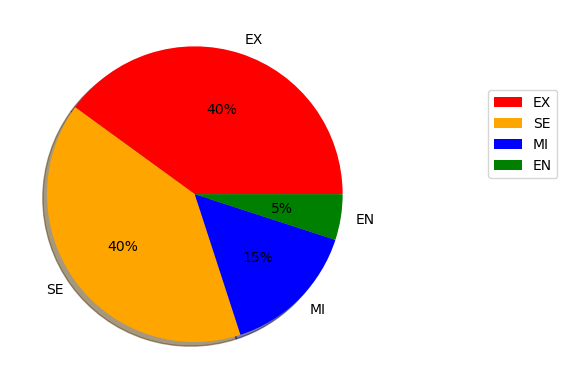

In [19]:
top20_counts_sorted_clean_data_salary_jobtitle_exp_avg
plt.pie(top20_counts_sorted_clean_data_salary_jobtitle_exp_avg, labels=top20_counts_sorted_clean_data_salary_jobtitle_exp_avg.index, colors=['red','orange','blue','green'],
         shadow=True, autopct='%1.f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 0.8))
# Save an image of the chart and print to screen
plt.savefig("Top-20-Job-exp-avgsalary-chart.png")
plt.show()

This analysis shows how many different job titles there are in the data science field in the US and the average salary for each

In [20]:
clean_data_salary_jobtitle_avg = clean_data.groupby(['job_title'])['salary'].mean()
clean_data_salary_jobtitle_avg
sorted_data_salary_jobtitle_avg= clean_data_salary_jobtitle_avg.sort_values(ascending=False)
sorted_data_salary_jobtitle_avg

job_title
Head of Data Science          267475.000000
Head of Machine Learning      259000.000000
AWS Data Architect            258000.000000
Head of Data                  254078.947368
AI Architect                  253454.545455
                                  ...      
Data Management Analyst        70500.000000
Lead Data Analyst              68000.000000
Compliance Data Analyst        60000.000000
BI Data Engineer               60000.000000
Data Operations Specialist     55355.000000
Name: salary, Length: 85, dtype: float64

The analysis below shows the top 5 job titles based on count or popularity and their respective average salary

In [21]:
clean_data_salary_jobtitle_avg = clean_data.groupby(['job_title'])['salary'].mean()
clean_data_salary_jobtitle_avg
job_title_counts = clean_data['job_title'].value_counts()
job_title_counts_df=pd.DataFrame({'job_title':job_title_counts.index,'job_title_counts':job_title_counts.values})
clean_data_salary_jobtitle_avg_df = clean_data_salary_jobtitle_avg.reset_index()

result_df =pd.merge(job_title_counts_df,clean_data_salary_jobtitle_avg_df, on='job_title')
top_5_result =result_df.head(5)
top_5_result

,job_title,job_title_counts,salary
0,Data Engineer,1636,155722.742054
1,Data Scientist,1475,170313.848136
2,Data Analyst,1076,113228.368959
3,Machine Learning Engineer,853,195266.932005
4,Applied Scientist,272,191269.033088


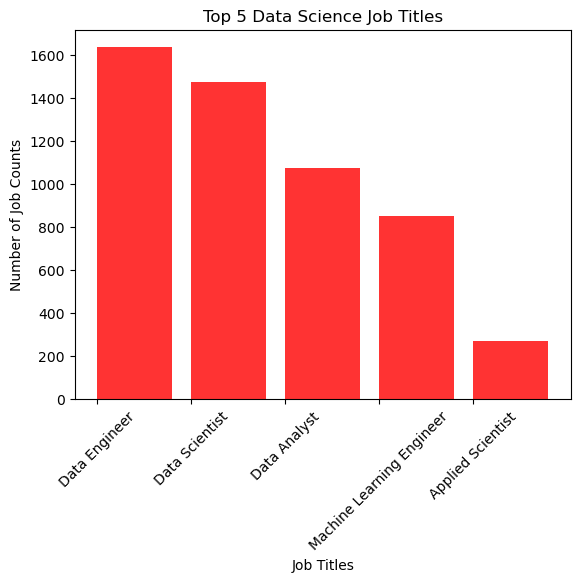

In [22]:
plt.bar(top_5_result['job_title'], top_5_result['job_title_counts'], color='r', alpha=0.8, align="edge")
plt.title('Top 5 Data Science Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Number of Job Counts')
plt.xticks(rotation=45, ha='center')
# Save an image of the chart and print to screen
plt.savefig("Top-5-Job-Titles-chart.png")
plt.show()

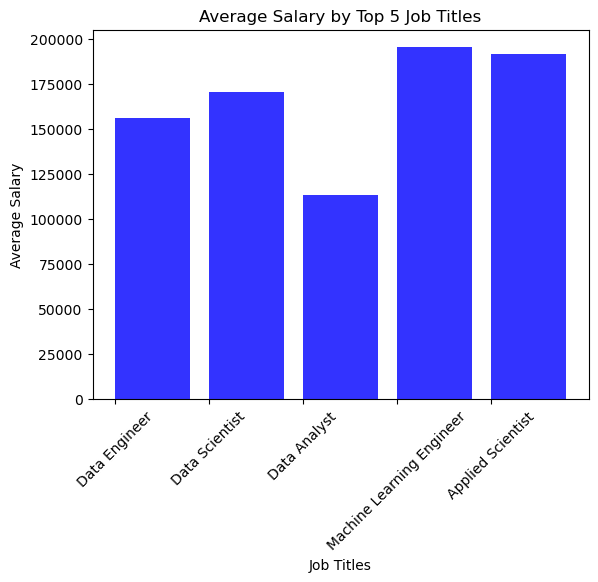

In [23]:
plt.bar(top_5_result['job_title'], top_5_result['salary'], color='b', alpha=0.8, align="edge")
plt.title('Average Salary by Top 5 Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='center')
# Save an image of the chart and print to screen
plt.savefig("Top-5-job-titles-Average-Salary-chart.png")
plt.show()

In [24]:
clean_data_salary_mode = clean_data.mode()
clean_data_salary_mode

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Engineer,150000,USD,150000,US,0,US,M
